In [2]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype
%matplotlib inline
from pandas.plotting import autocorrelation_plot
from fbprophet import Prophet


In [6]:
# Upload Data 2018-19
jan=pd.read_csv(r"..\Data 2019\201901-capitalbikeshare-tripdata.csv")
feb=pd.read_csv(r"..\Data 2019\201902-capitalbikeshare-tripdata.csv")
mar=pd.read_csv(r"..\Data 2019\201903-capitalbikeshare-tripdata.csv")
apr=pd.read_csv(r"..\Data 2019\201904-capitalbikeshare-tripdata.csv")
may=pd.read_csv(r"..\Data 2019\201905-capitalbikeshare-tripdata.csv")
jun=pd.read_csv(r"..\Data 2019\201906-capitalbikeshare-tripdata.csv")
jul=pd.read_csv(r"..\Data 2019\201907-capitalbikeshare-tripdata.txt")
aug=pd.read_csv(r"..\Data 2019\201908-capitalbikeshare-tripdata.csv")
sep=pd.read_csv(r"..\Data 2019\201909-capitalbikeshare-tripdata.csv")
ott=pd.read_csv(r"..\Data 2019\201910-capitalbikeshare-tripdata.csv")
nov=pd.read_csv(r"..\Data 2019\201911-capitalbikeshare-tripdata.csv")
dec=pd.read_csv(r"..\Data 2019\201912-capitalbikeshare-tripdata.csv")
jan2018=pd.read_csv(r"..\Data 2018\201801_capitalbikeshare_tripdata.csv")
feb2018=pd.read_csv(r"..\Data 2018\201802-capitalbikeshare-tripdata.csv")
mar2018=pd.read_csv(r"..\Data 2018\201803-capitalbikeshare-tripdata.csv")
apr2018=pd.read_csv(r"..\Data 2018\201804-capitalbikeshare-tripdata.csv")
may2018=pd.read_csv(r"..\Data 2018\201805-capitalbikeshare-tripdata.csv")
jun2018=pd.read_csv(r"..\Data 2018\201806-capitalbikeshare-tripdata.csv")
jul2018=pd.read_csv(r"..\Data 2018\201807-capitalbikeshare-tripdata.csv")
aug2018=pd.read_csv(r"..\Data 2018\201808-capitalbikeshare-tripdata.csv")
sep2018=pd.read_csv(r"..\Data 2018\201809-capitalbikeshare-tripdata.csv")
ott2018=pd.read_csv(r"..\Data 2018\201810-capitalbikeshare-tripdata.csv")
nov2018=pd.read_csv(r"..\Data 2018\201811-capitalbikeshare-tripdata.csv")
dec2018=pd.read_csv(r"..\Data 2018\201812-capitalbikeshare-tripdata.csv")

In [3]:
# check on data formatting, number of columns and matching features - 3 samples -> data was throughout 2018 and 19 made public with a consistent format.

jan2018.head()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,552,2018-01-01 00:05:06,2018-01-01 00:14:18,31104,Adams Mill & Columbia Rd NW,31400,Georgia & New Hampshire Ave NW,W00886,Member
1,1282,2018-01-01 00:14:30,2018-01-01 00:35:53,31321,15th St & Constitution Ave NW,31321,15th St & Constitution Ave NW,W01435,Casual
2,1265,2018-01-01 00:14:53,2018-01-01 00:35:58,31321,15th St & Constitution Ave NW,31321,15th St & Constitution Ave NW,W21242,Casual
3,578,2018-01-01 00:15:31,2018-01-01 00:25:09,31406,14th & Upshur St NW,31103,16th & Harvard St NW,W21322,Casual
4,372,2018-01-01 00:18:02,2018-01-01 00:24:15,31618,4th & East Capitol St NE,31619,Lincoln Park / 13th & East Capitol St NE,W00119,Member


In [4]:
jan.head()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,230,2019-01-01 00:04:48,2019-01-01 00:08:39,31203,14th & Rhode Island Ave NW,31200,Massachusetts Ave & Dupont Circle NW,E00141,Member
1,1549,2019-01-01 00:06:37,2019-01-01 00:32:27,31321,15th St & Constitution Ave NW,31114,18th St & Wyoming Ave NW,W24067,Casual
2,177,2019-01-01 00:08:46,2019-01-01 00:11:44,31104,Adams Mill & Columbia Rd NW,31323,Woodley Park Metro / Calvert St & Connecticut ...,W22654,Casual
3,228,2019-01-01 00:08:47,2019-01-01 00:12:35,31281,8th & O St NW,31280,11th & S St NW,W22336,Member
4,1300,2019-01-01 00:12:29,2019-01-01 00:34:10,31014,Lynn & 19th St North,31923,Columbia Pike & S Taylor St,70004,Member


In [5]:
dec.head()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,163,2019-12-01 00:00:25,2019-12-01 00:03:08,31609,Maine Ave & 7th St SW,31294,7th & E St SW,W21186,Member
1,309,2019-12-01 00:02:41,2019-12-01 00:07:50,31104,Adams Mill & Columbia Rd NW,31602,Park Rd & Holmead Pl NW,W23636,Member
2,1527,2019-12-01 00:05:34,2019-12-01 00:31:02,31106,Calvert & Biltmore St NW,31301,Ward Circle / American University,W00501,Member
3,1509,2019-12-01 00:05:43,2019-12-01 00:30:53,31106,Calvert & Biltmore St NW,31301,Ward Circle / American University,W22863,Member
4,81,2019-12-01 00:06:04,2019-12-01 00:07:26,31265,5th St & Massachusetts Ave NW,31600,5th & K St NW,W00236,Member


In [6]:
# Proceed with concatenation

y2018_19 = pd.concat([jan,feb,mar,apr,may,jun,jul,aug,sep,ott,nov,dec,jan2018,feb2018,mar2018,apr2018,may2018,jun2018,jul2018,aug2018,sep2018,ott2018,nov2018,dec2018])

In [7]:
# exporting concatenated Data in form of csv 

y2018_19.to_csv(r"Capital Bikeshare 2018-19.csv")

In [8]:
# Drop columns not interesting for current study and rename remaining columns

y2018_19.drop(columns=["Start station number","Start station","End station number","End station","End date","Bike number"], inplace=True)
y2018_19.rename(columns={"Start date" : "Start_date", "Member type": "Member_type"},inplace=True)

In [9]:
y2018_19.shape

(6941101, 3)

In [10]:
#Quick check on null values 

y2018_19.isnull().sum()

Duration       0
Start_date     0
Member_type    0
dtype: int64

In [11]:
# Data types check - change Start date to timestamp

y2018_19.dtypes

Duration        int64
Start_date     object
Member_type    object
dtype: object

In [12]:
# extract date from timestamp

y2018_19["Start_date"] = pd.to_datetime(y2018_19["Start_date"]).dt.date

In [13]:
# group by date to create new df and visualize flow of 2018-19

g1 = y2018_19.groupby(['Start_date']).size().reset_index()
g1.columns = ['date', 'count']
g1['date'] = pd.to_datetime(g1['date'])
g1 = g1.set_index("date")
g1

,count
date,
2018-01-01,1213
2018-01-02,3792
2018-01-03,4748
2018-01-04,2368
2018-01-05,2709
...,...
2019-12-27,4916
2019-12-28,6282
2019-12-29,1409


<Figure size 1440x345.6 with 0 Axes>

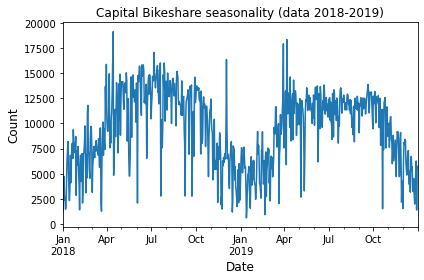

In [14]:
# 2018-19 rides distribution by date show seasonal path

plt.figure(figsize=(20,4.8))
ax1= g1.plot(legend=None)

plt.title("Capital Bikeshare seasonality (data 2018-2019)")
plt.style.use("seaborn-deep")
plt.ylabel('Count',fontsize="large")
plt.xlabel("Date", fontsize="large")
plt.tight_layout()
plt.savefig('Seasonality.png', dpi = 80)

In [15]:
y2018_19.head()

,Duration,Start_date,Member_type
0,230,2019-01-01,Member
1,1549,2019-01-01,Casual
2,177,2019-01-01,Casual
3,228,2019-01-01,Member
4,1300,2019-01-01,Member


In [16]:
y2018_19["Start_date"] = pd.to_datetime(y2018_19["Start_date"]) 

In [17]:
y2018_19.dtypes

Duration                int64
Start_date     datetime64[ns]
Member_type            object
dtype: object

In [18]:
# Prophet follows the sklearn model API. We create an instance of the Prophet class and then call its fit(Prophet.fit) methods.
# The input to Prophet is always a data frame with two columns: ds and y. The ds (date stamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a time stamp. The y column must be numeric, and represents the measurement we wish to forecast.

In [19]:
g6 = y2018_19.groupby(['Start_date']).size()
g6 = g6.reset_index()
g6.columns=["ds", "y"]
g6.head()

,ds,y
0,2018-01-01,1213
1,2018-01-02,3792
2,2018-01-03,4748
3,2018-01-04,2368
4,2018-01-05,2709


In [20]:
m = Prophet(interval_width=0.95, yearly_seasonality=True, daily_seasonality=True)
model = m.fit(g6)

In [21]:
future = m.make_future_dataframe(periods=180,freq='D')
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
905,2020-06-24,12354.556887,8172.808921,16538.289613
906,2020-06-25,12269.964255,8037.327357,16378.109984
907,2020-06-26,12249.591934,7884.939512,16503.431590
908,2020-06-27,11890.221364,7460.886888,16178.599020
909,2020-06-28,10344.007351,5808.409184,14613.522280


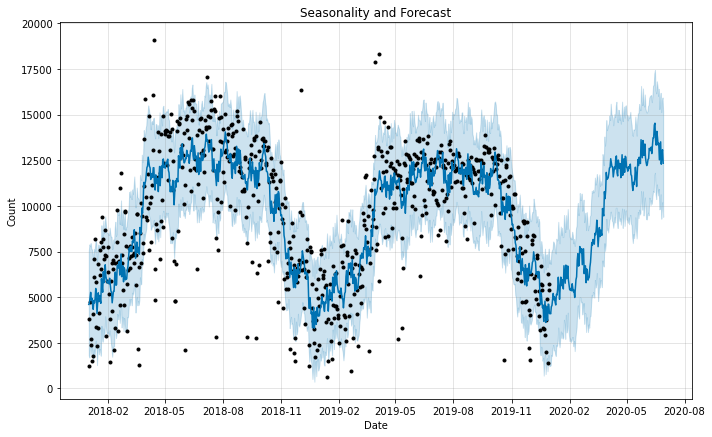

In [22]:
# Training data are the 730 days of 2018 and 2019
# The running prediction will display the first 180 days of 2020 


m = Prophet(n_changepoints=8,changepoint_prior_scale=0.5, daily_seasonality=False, yearly_seasonality=False, weekly_seasonality = False).add_seasonality(name="monthly", period= 30.5, fourier_order= 12).add_seasonality(name = 'yearly', period= 365.25, fourier_order = 20 )
forecast = m.fit(g6).predict(future)
fig = m.plot(forecast)
plt.xlabel("Date")
plt.tight_layout()
plt.ylabel("Count")
plt.title("Seasonality and Forecast")
plt.savefig("Seasonality and forecast.png",dpi=80)

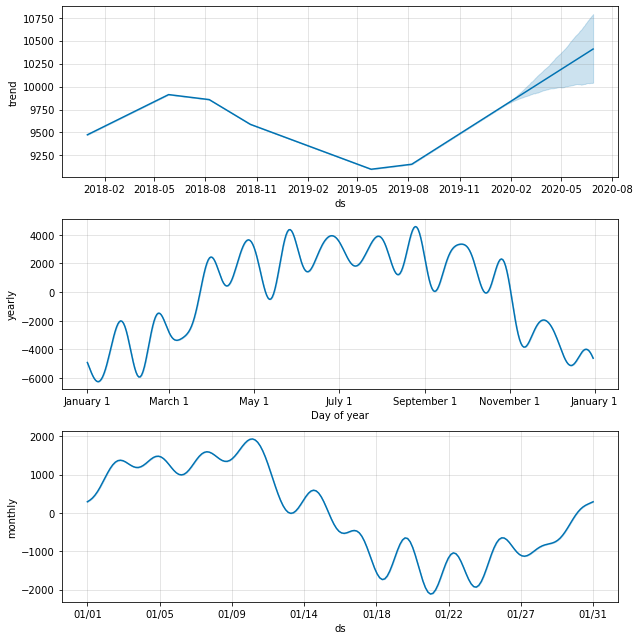

In [23]:
fig2 = m.plot_components(forecast)
plt.savefig("components.png",dpi=80)